# Project: Investigate a Dataset (Medical Appointment No-Shows)



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


>For this data investigation  project, i **chose** the dataset: `No-show appointments`. This dataset consists of `110,527` medical appointment records, showcasing wether the patient showed up for an appointment or not, including other extra columns to help us understand the context of our data even more. The goal for this project is to determine which  **factors** have a major effect on appointments attendance.

Here's a list of our dataset columns:

<ol>
<li><b>PatientId</b></li>
    Identification of a patient
<li><b>AppointmentID</b></li>
    Identification of each appointment
<li><b>Gender</b></li>
    Male or Female
<li><b>AppointmentDay</b></li>
    The day of the actuall appointment, when they have to visit the doctor
<li><b>ScheduledDay</b></li>
    The day someone called or registered the appointment, this is before appointment
<li><b>Age</b></li>
    How old is the patient
<li><b>Neighbourhood</b></li>
    Where the appointment takes place
<li><b>Scholarship</b></li>
    True or False, whether or not the patient is enrolled in Brasilian welfare program (Bolsa Família)
<li><b>Hipertension</b></li>
    True or False
<li><b>Diabetes</b></li>
    True or False
<li><b>Alcoholism</b></li>
    True or False
<li><b>Handcap</b></li>
    True or False
<li><b>SMS_received</b></li>
    1 or more messages sent to the patient
<li><b>No-show</b></li>
    True or False
</ol>



### Questions for Analysis

Here's a list of **questions** that came to my mind while going through the data:

>* Patient gender influence on appointment attendance?
>* Patient age influence on appointment attendance?
>* Patient location/neighbourhood influence on appointment attendance?
>* Sms-reminder-messages influence on appointment attendance?
>* Patient medical conditions influence on appointment attendance?
>* Patient scholarship (welfare program) influence on appointment attendance?
>* Days of week influence on appointment attendance?
>* Time duration influence on appointment attendance?

In [78]:
# import needed packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import datetime as dt
from datetime import datetime as dt

<a id='wrangling'></a>
## Data Wrangling


In this section, i will be loading the dataset and do basic investigation on the data and check how much cleaning-up is needed.

In [79]:
# load the data
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [80]:
# get the first few records of our data
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [81]:
# get the size of our data
df.shape
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 110527
Number of columns: 14


In [82]:
# get a general info about our data (number of records and columns, null values count, data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [83]:
# check for null values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [84]:
# get each column's unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [85]:
# get summary statistics of our data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [86]:
# check for duplicates
sum(df.duplicated())

0

In [87]:
# make sure we have correct data values for some of our columns
df_copy = df.copy()
df_copy = df_copy[["Gender", "Age", "No-show", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", "SMS_received"]]

# iterate through columns and get unique values
for name, values in df_copy.items():
    print('{}: {}'.format(name, values.unique())) 


Gender: ['F' 'M']
Age: [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
No-show: ['No' 'Yes']
Scholarship: [0 1]
Hipertension: [1 0]
Diabetes: [0 1]
Alcoholism: [0 1]
Handcap: [0 1 2 3 4]
SMS_received: [0 1]


>Well, it's good we don't have any null values nor duplicates (phew)! All seems great, but i did noticed some things that need to be fixed such as column name misspellings (ex: Hipertension), or extra unknown values for boolean columns that's supposed to have only binary values (ex: Handcap column). Also, we saw a negative value in age, **that's strange, no?**

>Alright, let's **start** doing some cleaning and maybe we'll find more fixes as we go.


### Data Cleaning
 
For this section, we will perform some cleaning up for our data.

>Now let's observe our data, we can see that most of our boolean columns are of {0,1} values, i will **convert** them into a {yes/no} form to make it more comprehinsble/readable. Also, i'll be **renaming** the column "no-show" as i find it confusing and a bit misleading corresponding to its values (yes/no). I'll also be **dropping** incorrect data records such as patients with negative age. Finally i'll handle the extra **unknown values** of column "Handicap".

Alright so far our cleaning process consists of:

>- Convert boolean values.
>- Rename/Fix column name.
>- Drop records of incorrect data.
>- Handle unknown values.

In [88]:
# convert every {0,1} value with {yes,no} instead
df['Scholarship'].replace({ 1: 'Yes', 0: 'No' }, inplace=True)
df['Hipertension'].replace({ 1: 'Yes', 0: 'No' }, inplace=True)
df['Diabetes'].replace({ 1: 'Yes', 0: 'No' }, inplace=True)
df['Alcoholism'].replace({ 1: 'Yes', 0: 'No' }, inplace=True)
df['Handcap'].replace({ 1: 'Yes', 0: 'No' }, inplace=True)
df['SMS_received'].replace({ 1: 'Yes', 0: 'No' }, inplace=True)

In [89]:
# rename columns
df.rename(columns = {'No-show': 'Attendance'}, inplace=True)

In [90]:
# fix typos
df.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)
df.rename(columns={'Handcap': 'Handicap'}, inplace=True)

In [91]:
# check incorrect record
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,No,No,No,No,No,No,No


In [92]:
# drop incorrect record 
incorrect_record = df.query('Age < 0')
df.drop(incorrect_record.index, inplace=True)

In [93]:
# make sure we deleted it
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance


We can see here column `Handicap` has values (2,3,4) that aren't clear what exactly they refer to, so we're gonna simply convert them to 1 since they're larger than 0.

In [94]:
# replace unkown extra values in Handicap to {yes}
df["Handicap"].replace({ 2:'Yes', 3:'Yes', 4:'Yes' }, inplace=True)

In [95]:
df['Handicap'].unique()

array(['No', 'Yes'], dtype=object)

In [96]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,No,No,No,No,No,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,No,No,No,No,No,No


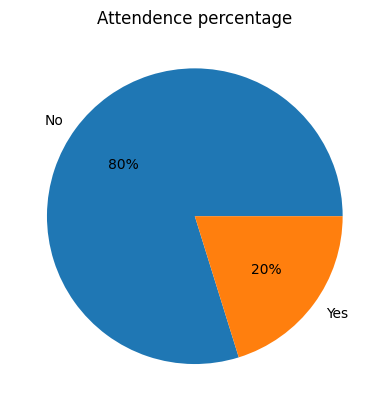

In [97]:
# get attendance stats
plt.pie(df['Attendance'].value_counts(),autopct='%1.0f%%', labels=['No', 'Yes'])
plt.title('Attendence percentage')
plt.show()

<a id='eda'></a>
## Exploratory Data Analysis


Now we'll dive into each question and **start** analyzing and exploring to find insights.

Let's bring back our questions here:

>* Patient gender influence on appointment attendance?
>* Patient age influence on appointment attendance?
>* Patient location/neighbourhood influence on appointment attendance?
>* Sms-reminder-messages influence on appointment attendance?
>* Patient medical conditions influence on appointment attendance?
>* Patient scholarship (welfare program) influence on appointment attendance?
>* Days of week influence on appointment attendance?
>* Time duration influence on appointment attendance?

First off, i'm gonna create reusable functions for plotting our data, so it doesn't get too repetitve along the way, **let's do it!**

In [133]:
def hist_chart(variable_one, variable_two = 'Attendance', data=df, chart_title ='', bin_label='', xlabel='', ylabel=''):
    data[variable_one].hist(alpha=0.5, bins=50, label=bin_label)
    plt.legend();
    plt.title(chart_title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

In [98]:
def plot_bar(variable_one, variable_two):
    ax=sns.countplot(x=df[variable_one], hue=df[variable_two], data=df)
    ax.set(xlabel=variable_one,
            ylabel='{} count'.format(variable_two),
            title= '{} vs {}'.format(variable_two, variable_one))
    plt.show();

def bar_chart(variable_one, variable_two = 'Attendance', rotate_x_label = False):
    if (rotate_x_label == True):
        plt.figure(figsize=(25,10))
        plt.xticks(rotation=90)
        plot(variable_one, variable_two)

    else:
        plot(variable_one, variable_two)

## 1- Patient gender influence on appointment attendance?

In [99]:
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [100]:
# get attendance of each gender
df.groupby('Attendance')['Gender'].value_counts()

Attendance  Gender
No          F         57245
            M         30962
Yes         F         14594
            M          7725
Name: Gender, dtype: int64

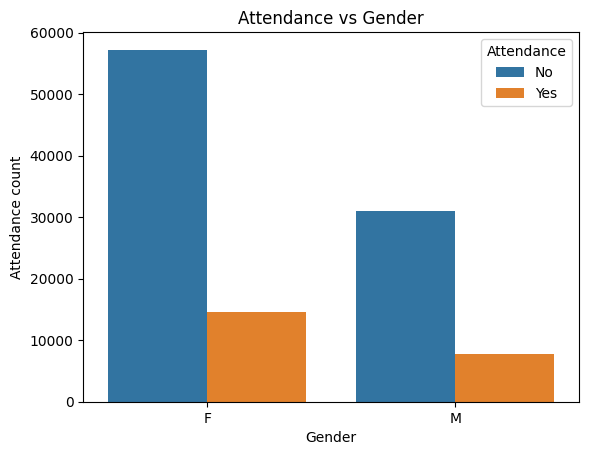

In [101]:
# plot data
bar_chart('Gender');

### Conclusion:
> Attendance count for both genders are very **similar**, with the majority being a no-show for both genders. This implies no major role a patient gender has.

### 2- Patient age influence on appointment attendance?

In [102]:
# get attendance for different ages
df.groupby('Attendance')['Age'].value_counts()

Attendance  Age
No          0      2900
            1      1858
            52     1449
            56     1372
            2      1366
                   ... 
Yes         95        6
            115       3
            97        2
            96        1
            98        1
Name: Age, Length: 203, dtype: int64

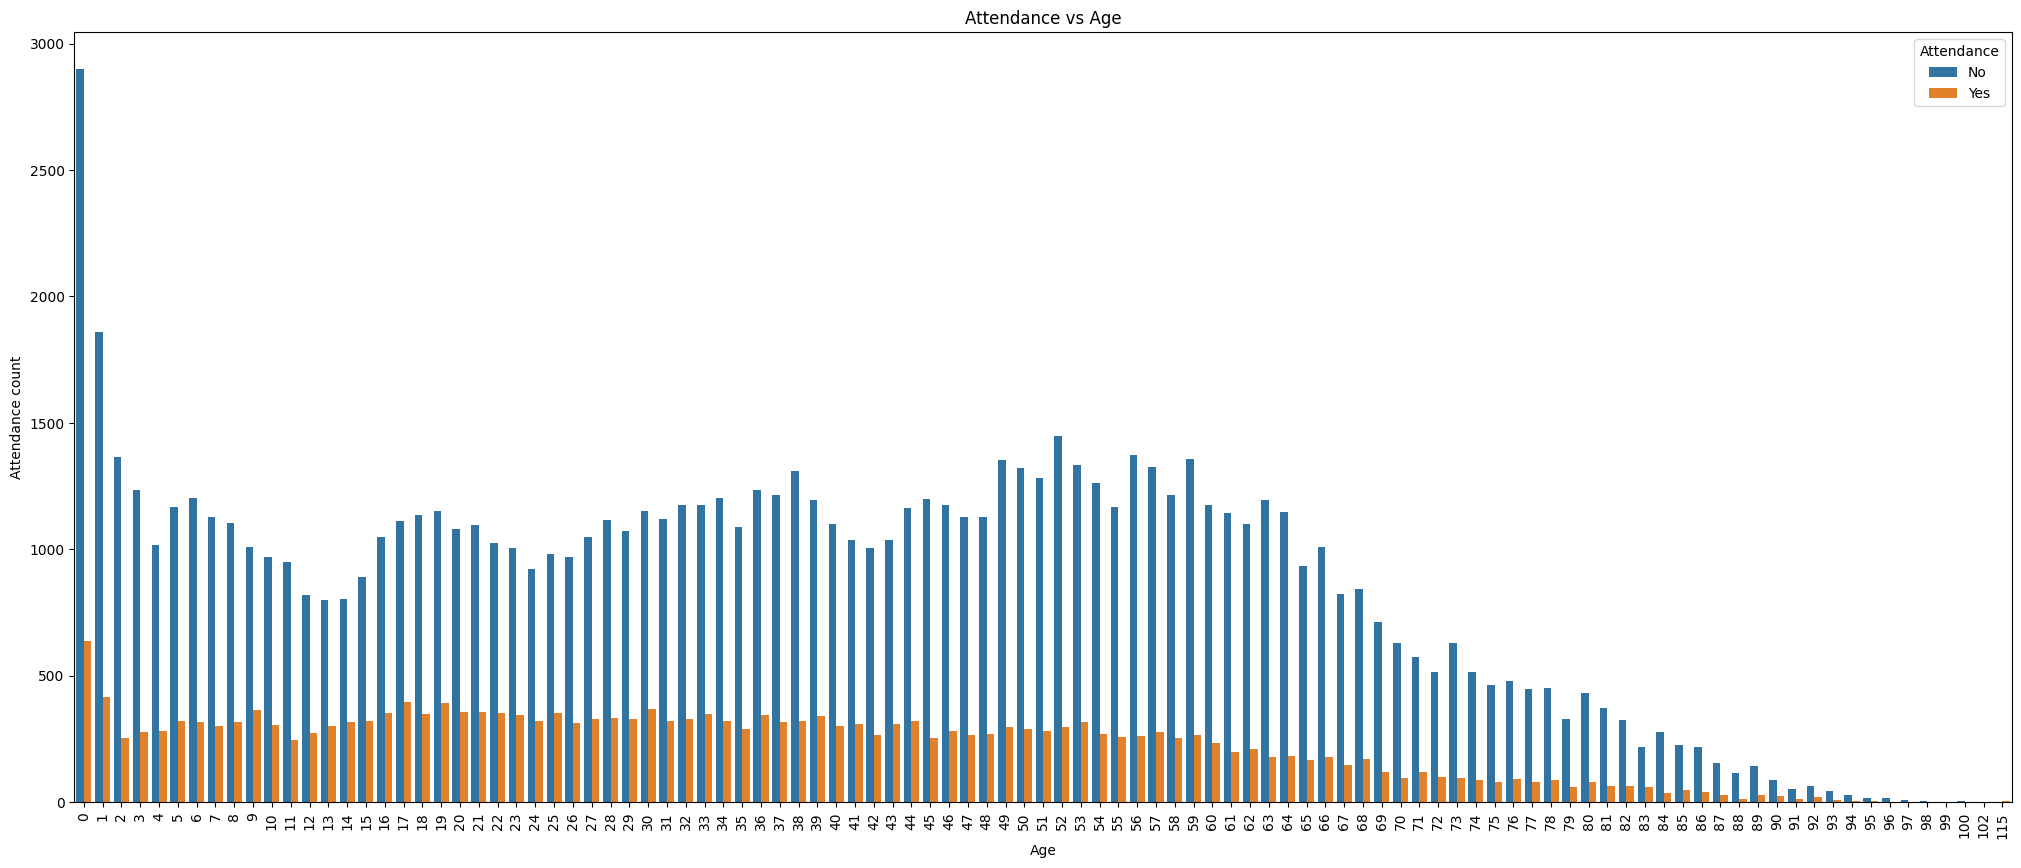

In [103]:
# plot data
bar_chart('Age', rotate_x_label=True);

### Conclusion:
> We can see that appointment attendance is steady from years 1 to 60, and then it decreases afterwards. I don't see how age is influencing appointment attendance as there is no **evident** trend associated.

### 3- Patient location/neighbourhood influence on appointment attendance?

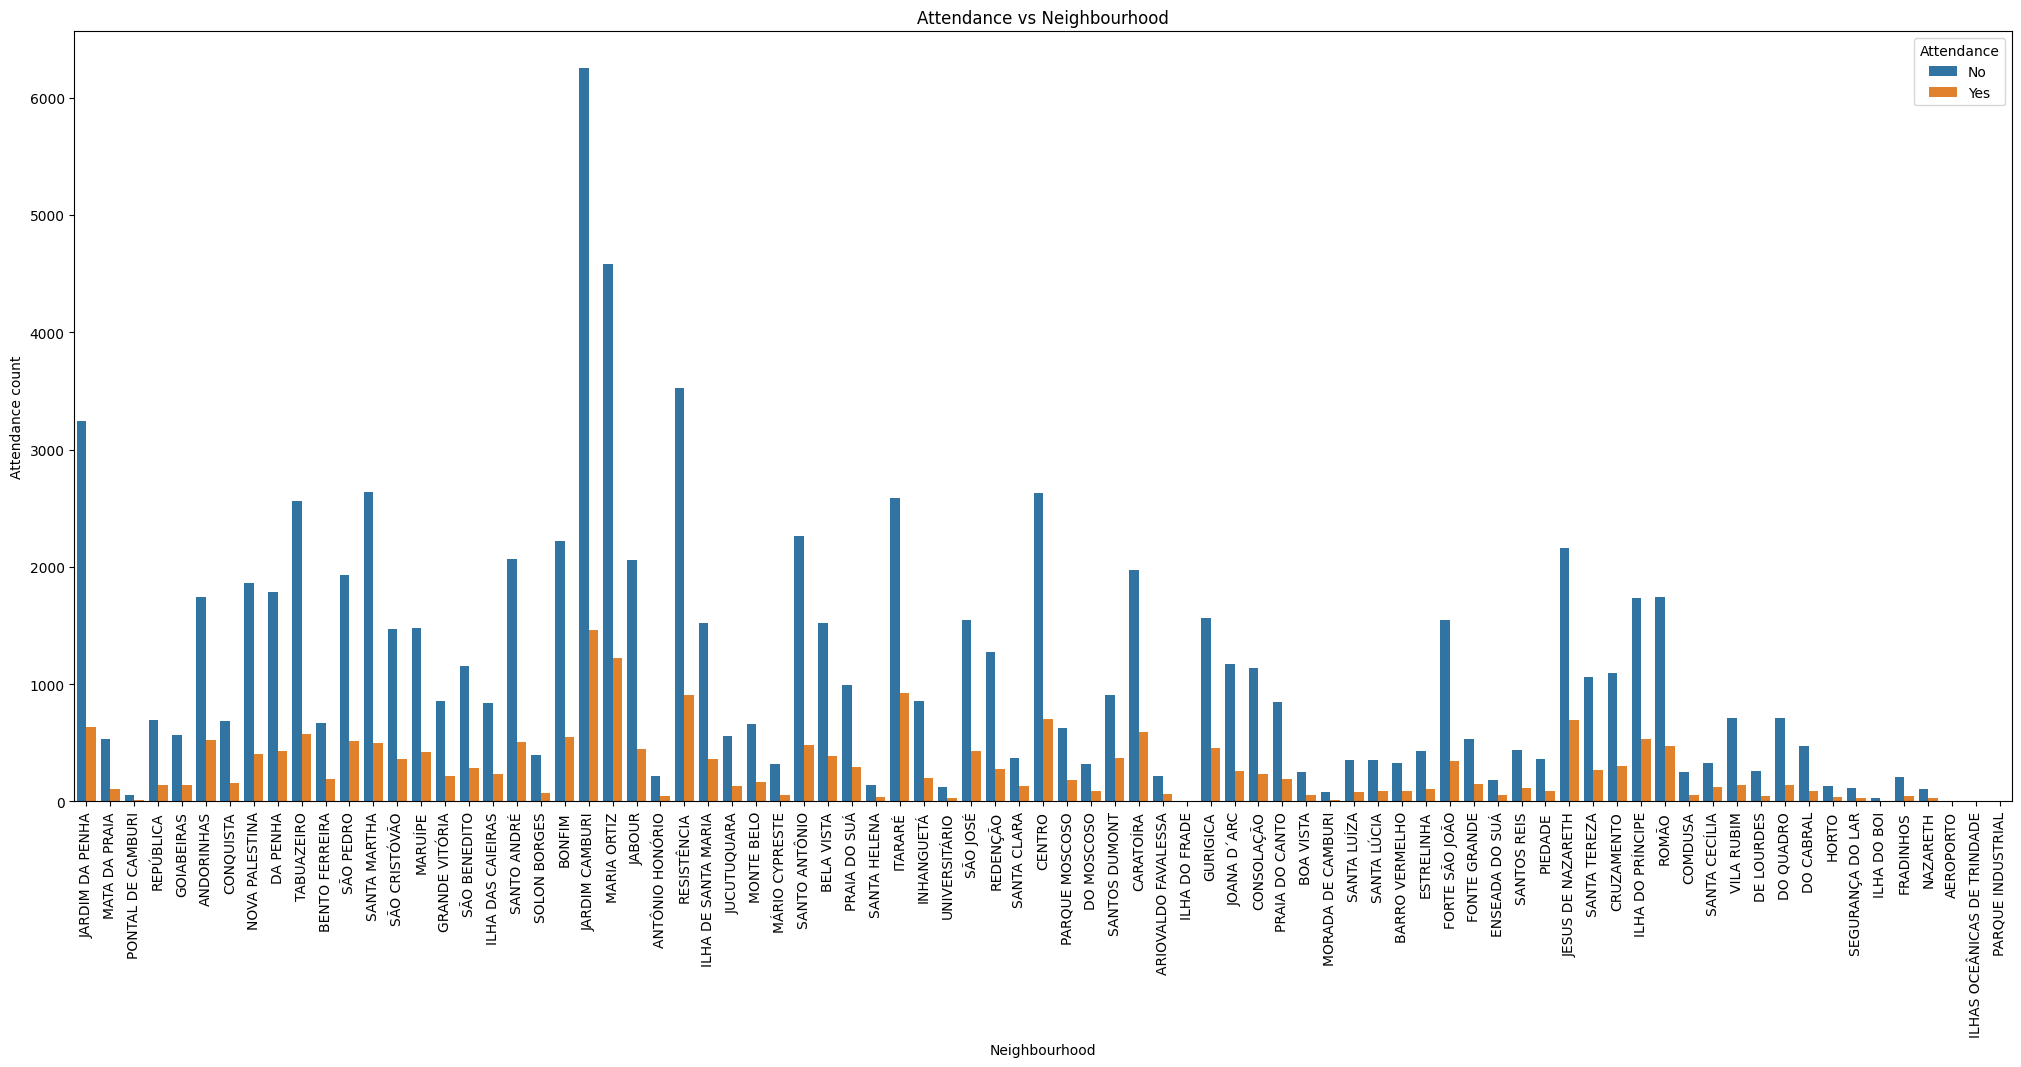

In [104]:
# plot data
bar_chart('Neighbourhood', rotate_x_label=True);

### Conclusion:
> As we can see, patients from certain neighbourhoods are likely to skip appointment more than others, which indicates that patient neighbourhoods/location has a **major** role and influence. The data showcases how patient who skip appointment the most are from certain areas such as Jardim Camburi & Maria Ortiz and others as well.

### 4- Sms-reminder-messages influence on appointment attendance?


In [105]:
df['SMS_received'].value_counts()

No     75044
Yes    35482
Name: SMS_received, dtype: int64

In [106]:
# get attendance values
df.groupby('SMS_received')['Attendance'].value_counts()

SMS_received  Attendance
No            No            62509
              Yes           12535
Yes           No            25698
              Yes            9784
Name: Attendance, dtype: int64

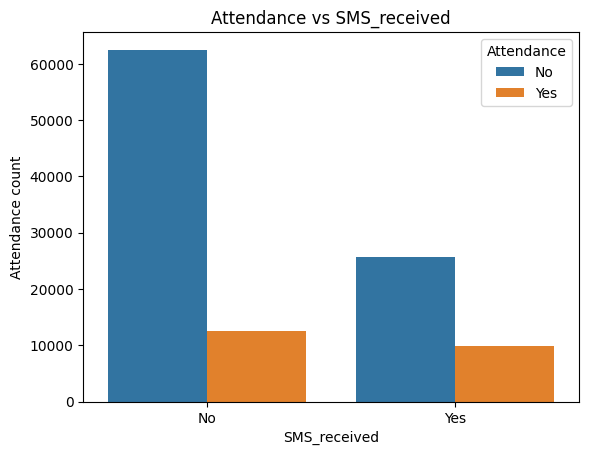

In [107]:
# plot data
bar_chart('SMS_received');

### Conclusion:
> It's pretty clear that patients who did not receive sms, are the ones who did not show up for their appointments by a large scale. So It indeed has an influence on attendance! But it's also **strange** that most of patients who did receive sms did not show up anyway. Maybe the hospital needs to improve their sms approach? 

### 5- Patient medical conditions influence on appointment attendance?


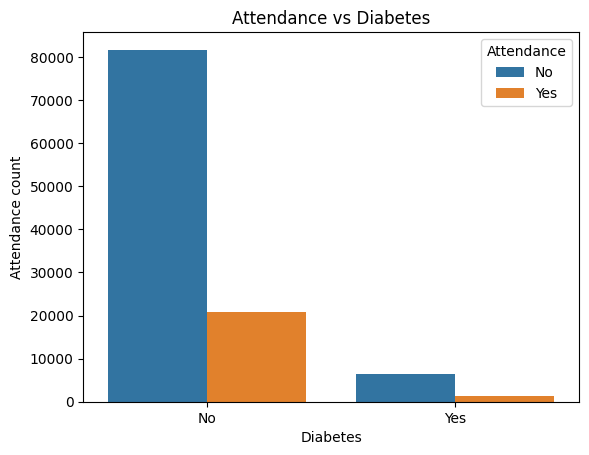

In [108]:
df.groupby('Diabetes')['Attendance'].value_counts()

# plot data
bar_chart('Diabetes');

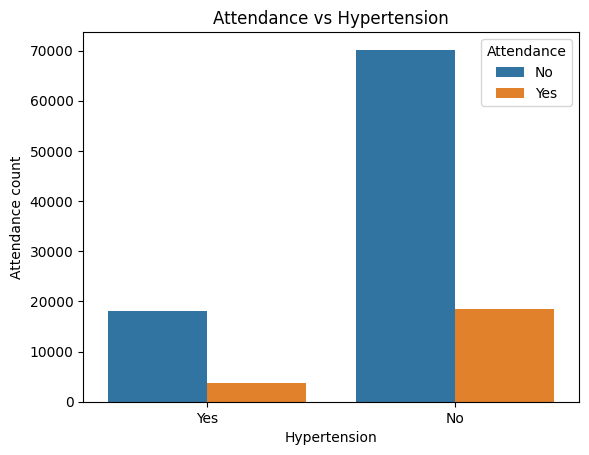

In [109]:
df.groupby('Hypertension')['Attendance'].value_counts()

# plot data
bar_chart('Hypertension');

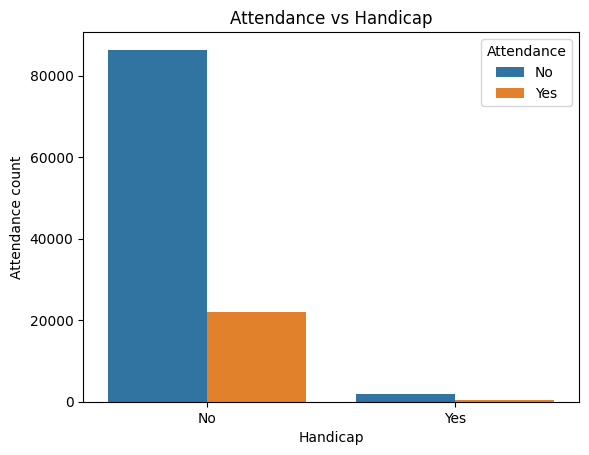

In [110]:
df.groupby('Handicap')['Attendance'].value_counts()

# plot data
bar_chart('Handicap');

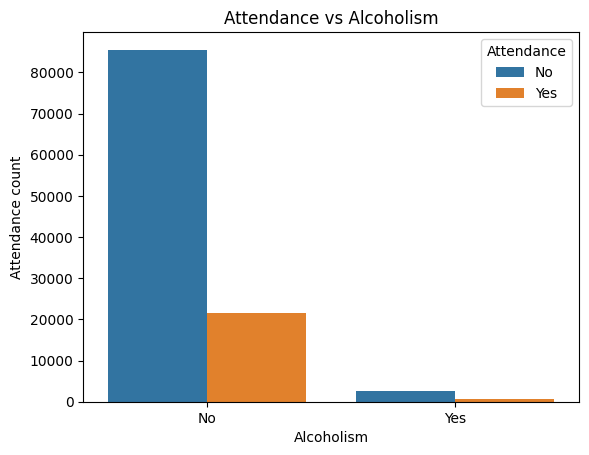

In [111]:
df.groupby('Alcoholism')['Attendance'].value_counts()

# plot data
bar_chart('Alcoholism');

### Conclusion:
> Patients who suffer from these medical conditions has approximately the same attendance rate as other patients, which is **interesting** and not like what i assumed! There is no great difference nor an indication that it has an influence over attendance.

### 6- Patient scholarship (welfare program) influence on appointment attendance?

In [112]:
df.groupby('Scholarship')['Attendance'].value_counts()

Scholarship  Attendance
No           No            79924
             Yes           19741
Yes          No             8283
             Yes            2578
Name: Attendance, dtype: int64

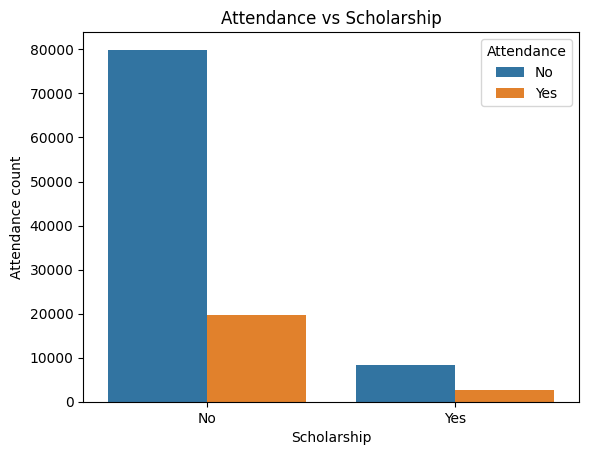

In [113]:
# plot data
bar_chart('Scholarship');

### Conclusion:
> The chart clearly shows us that most patients who skip their appointment have no scholarchip (aren't registered to the welfare program) which really makes **sense**. Interestingly, even those who are registered have a majority of no-show. The influence is very clear and indeed the scholarchip playes a significant role on attendance.

### 7- Days of week influence on appointment attendance?

In [114]:
# get appointment days 
convertDate = pd.to_datetime(df['AppointmentDay'])

df['Appointment_to_Day'] = convertDate.dt.day_name()

In [115]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance,Appointment_to_Day
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No,Friday
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,No,No,No,No,No,No,Friday
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,No,No,No,No,No,No,Friday


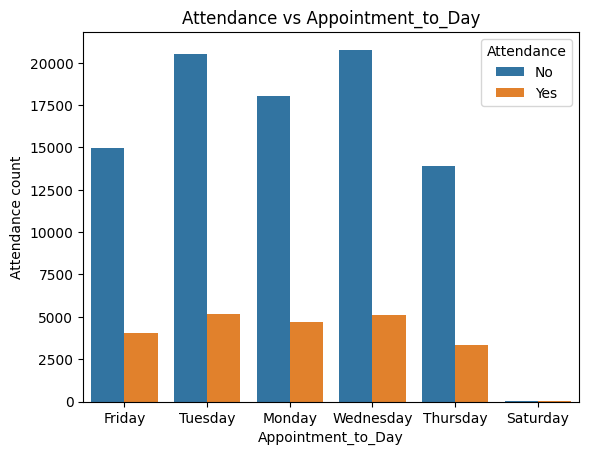

In [116]:
df.groupby('Appointment_to_Day')['Attendance'].value_counts()

# plot data
bar_chart('Appointment_to_Day');

### Conclusion:
> We can see how days in the middle of the week have the highest no-show rate (Tuesday, Wedenesday). This could be due to people not being able to have appointments on the weekends (since there's no appointments data collected on the weekends)? That's one **possibility**! So yes i believe days of week do have an influence on patients attendance.

### 8- Time duration influence on appointment attendance?

In [117]:
# get duration between scheduled day and appointment dat
df['waiting_duration_days'] = (pd.to_datetime(df['AppointmentDay']).dt.floor('d') - pd.to_datetime(df['ScheduledDay'])).dt.days 

In [118]:
df['waiting_duration_days'].unique()

array([ -1,   1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,
        27,  23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,
        45,  38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,
        83,  77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,
        48,  72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,
         7,   4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,
        76,  68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  -2,
        79,  85,  97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,
        89, 150, 125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121,
       100, 104,  91,  96,  92, 106,  94,  -7, 138, 131, 178, 116, 145,
       122])

In [119]:
df.query('waiting_duration_days < 0').shape

(38567, 16)

In [120]:
df['waiting_duration_days'].replace({ -1: 0, -2: 0, -7: 0}, inplace=True)

In [121]:
df.query('waiting_duration_days < 0').shape

(0, 16)

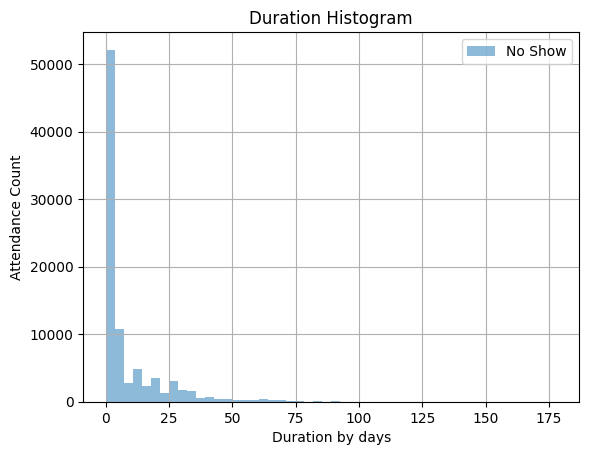

In [134]:
df_nshow = df[df['Attendance'] == 'No']
hist_chart('waiting_duration_days', 'Attendance', df_nshow ,'Duration Histogram', 'No Show', 'Duration by days', 'Attendance Count')

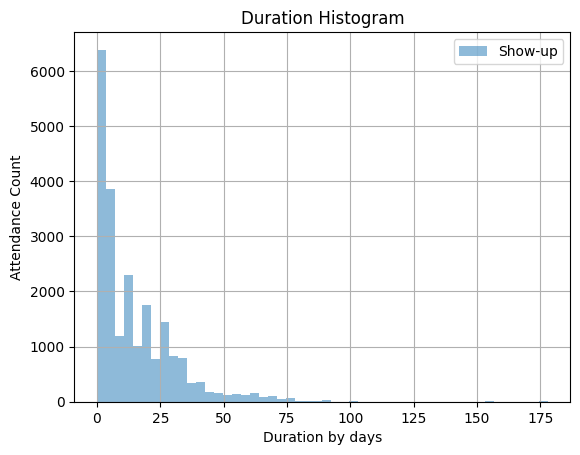

In [136]:
df_show = df[df['Attendance'] == 'Yes']
hist_chart('waiting_duration_days', 'Attendance', df_show ,'Duration Histogram', 'Show-up', 'Duration by days', 'Attendance Count')

### Conclusion:
> We can see that when the duration time increases, the possibility of patients showing up for their appointments decreases. For example, mostly when it exceeds 25 days, patients are likely to skip their appointments. Therefore the sooner the appointment the better! Waiting time does have an influence **indeed**!

### Final Conclusions:


>- **80%** of patients did not show up, while only **20%** did show for their appointments.
>- Most patients are **females**.
>- **Factors** that most influence patient attendance to appointment are: Neighborhood, SMS messages, patients welfare program, weekdays, and finally the number of days between scheduled day and appointment day (duration).
>- As duration time **increase**, the chances of patients attendance decreases.
>- Patients who did not receive SMS mostly **didn't show up**, however even those who received it has a majority of no show, which requires a further investigation to hospital sms approach.
>- Patients neighborhood clearly does **affect** their attendance.
>- Patients who are registered to the welfare program **mostly** show up for their appointments.


### Limitations:

>- Scheduling appointments started in `2015-11-10`, while the first appointment recorded in this data has been in `April 2016`, **there's a big gap here** and perhaps that's one of the reason most patients didn't show up for their appointments?
>- Appointments in this dataset has only been collected for 3 months, i believe more collected data across all times of year would be more **insightful**.
>- It would've been more helpful if the time wasn't reset to 00:00 in 'AppointmentDay' column, as they would be very **significant/influential** to patient attendance.

In [132]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 956650 bytes to Investigate_a_Dataset.html
